<a href="https://colab.research.google.com/github/Found-Bugs/Pengolahan-Citra-Visi-Komputer/blob/Week-6/Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

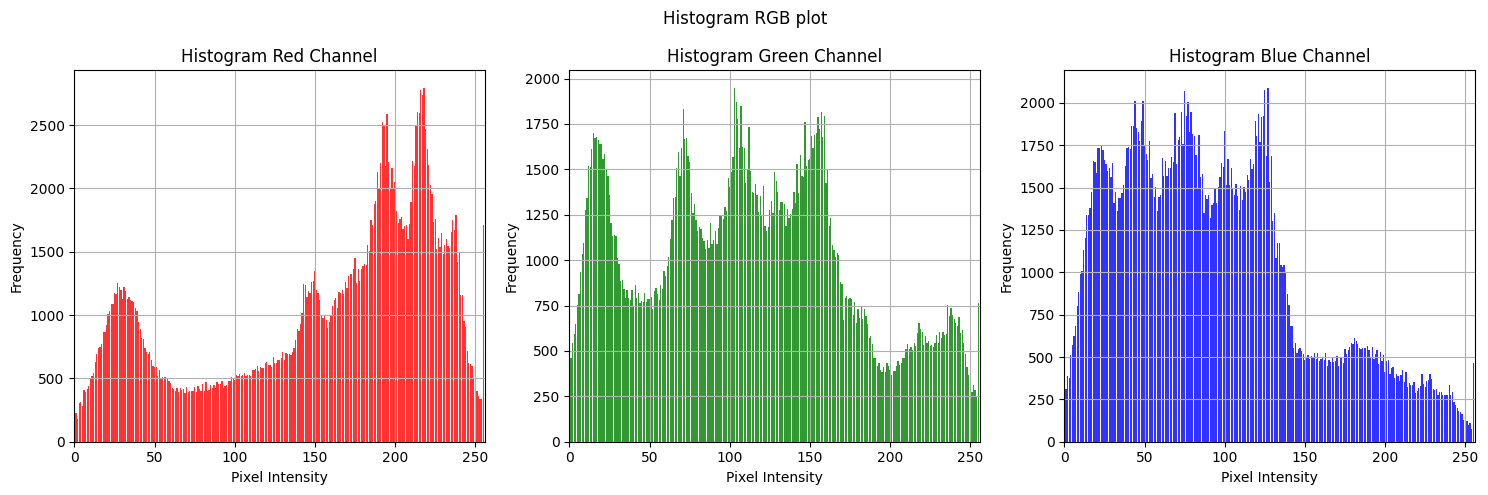

In [3]:
# Step 1: Membaca gambar berwarna
img_color = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
img_color = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)

# Step 2: Menghitung histogram untuk setiap channel R, G, B
colors = ('red', 'green', 'blue')
channel_names = ['Red Channel', 'Green Channel', 'Blue Channel']

plt.figure(figsize=(15, 5))
plt.suptitle('Histogram RGB plot')

for i, col in enumerate(colors):
    plt.subplot(1, 3, i + 1)  # Membuat 3 subplots dalam 1 baris
    hist = cv.calcHist([img_color], [i], None, [256], [0, 256])
    plt.bar(range(256), hist[:, 0], color=col, alpha=0.8)  # Pastikan hist diakses dengan benar
    plt.title(f"Histogram {channel_names[i]}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.xlim([0, 256])  # Mengatur batas x untuk histogram
    plt.grid(True)

plt.tight_layout()
plt.show()

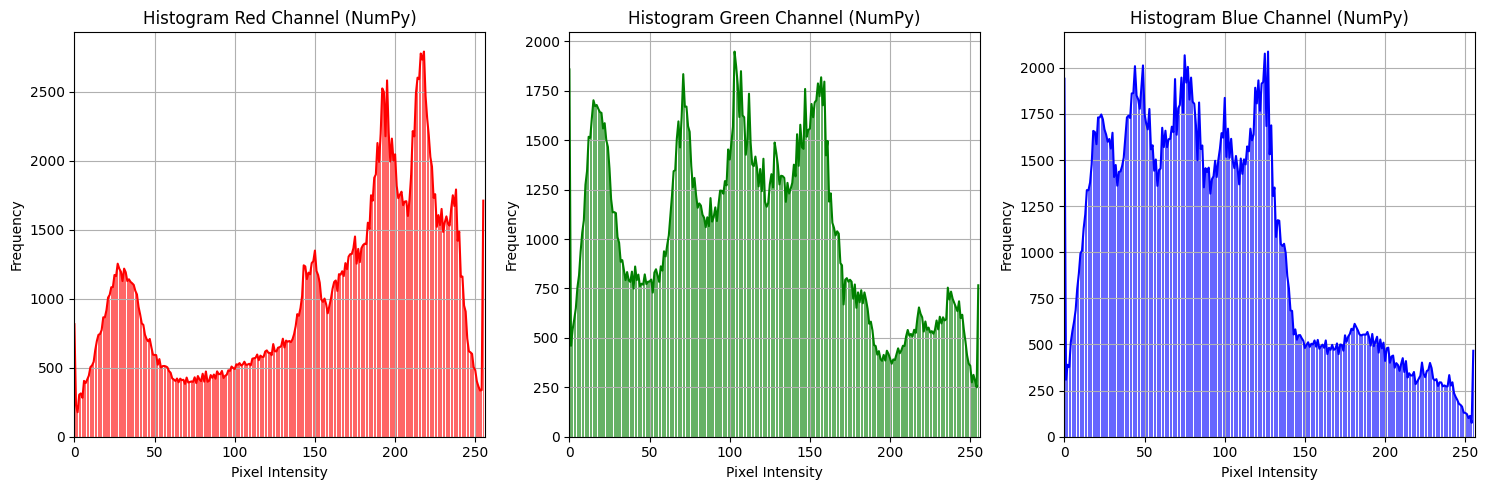

In [4]:
# Membaca gambar berwarna
img_color = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
img_color = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)

# Menghitung histogram untuk setiap channel B, G, R
colors = ('r', 'g', 'b')
channel_names = ['Red Channel', 'Green Channel', 'Blue Channel']

plt.figure(figsize=(15, 5))

for i, col in enumerate(colors):
    plt.subplot(1, 3, i+1)  # 3 subplots in one row for each color channel
    channel_data = img_color[:, :, i].ravel()  # Flatten the image channel data
    hist, bins = np.histogram(channel_data, bins=256, range=[0, 256])  # NumPy histogram
    plt.plot(hist, color=col)  # Plot histogram
    plt.bar(range(256), hist, color=col, alpha=0.6)  # Fill color
    plt.xlim([0, 256])
    plt.title(f"Histogram {channel_names[i]} (NumPy)")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.grid(True)

plt.tight_layout()
plt.show()

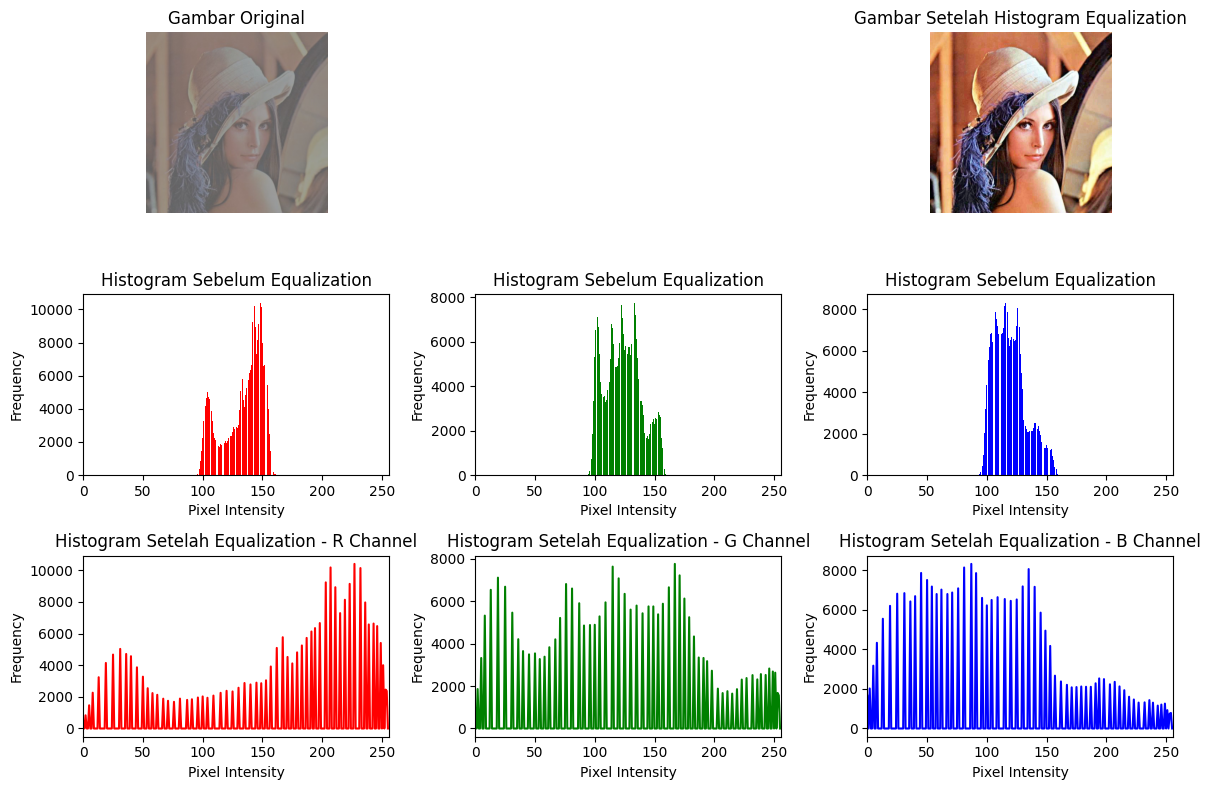

In [5]:
# Step 1: Input image (lena_lc.jpg)
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Step 2: Menghitung jumlah kemunculan setiap pixel warna (frekuensi)
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

# Step 3: Menghitung penjumlahan kumulatif dari frekuensi
cdf = hist.cumsum()

# Step 4: Normalisasi, membagi dengan jumlah total pixel
cdf_normalized = cdf * hist.max() / cdf.max()

# Step 5: Implementasi rumus k0, Normalisasi CDF
cdf_m = np.ma.masked_equal(cdf, 0)  # Mengabaikan nilai 0
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())  # Rumus Normalisasi
cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')  # Mengisi kembali nilai yang diabaikan

# Step 6: Menerapkan CDF hasil equalization pada gambar
img_equalized = cdf_final[img]

plt.figure(figsize=(12, 8))

plt.subplot(3, 3, 1)
plt.imshow(img)
plt.title('Gambar Original')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(img_equalized)
plt.title('Gambar Setelah Histogram Equalization')
plt.axis('off')

colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    plt.subplot(3, 3, 3 + i + 1)
    hist = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.bar(range(256), hist.flatten(), color=color)
    plt.title('Histogram Sebelum Equalization')
    plt.xlim([0, 256])
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

for i, color in enumerate(colors):
    plt.subplot(3, 3, 6 + i + 1)  # 3 rows, 2 columns
    hist_eq = cv.calcHist([img_equalized], [i], None, [256], [0, 256])
    plt.plot(hist_eq, color=color)
    plt.title(f'Histogram Setelah Equalization - {color.upper()} Channel')
    plt.xlim([0, 256])
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

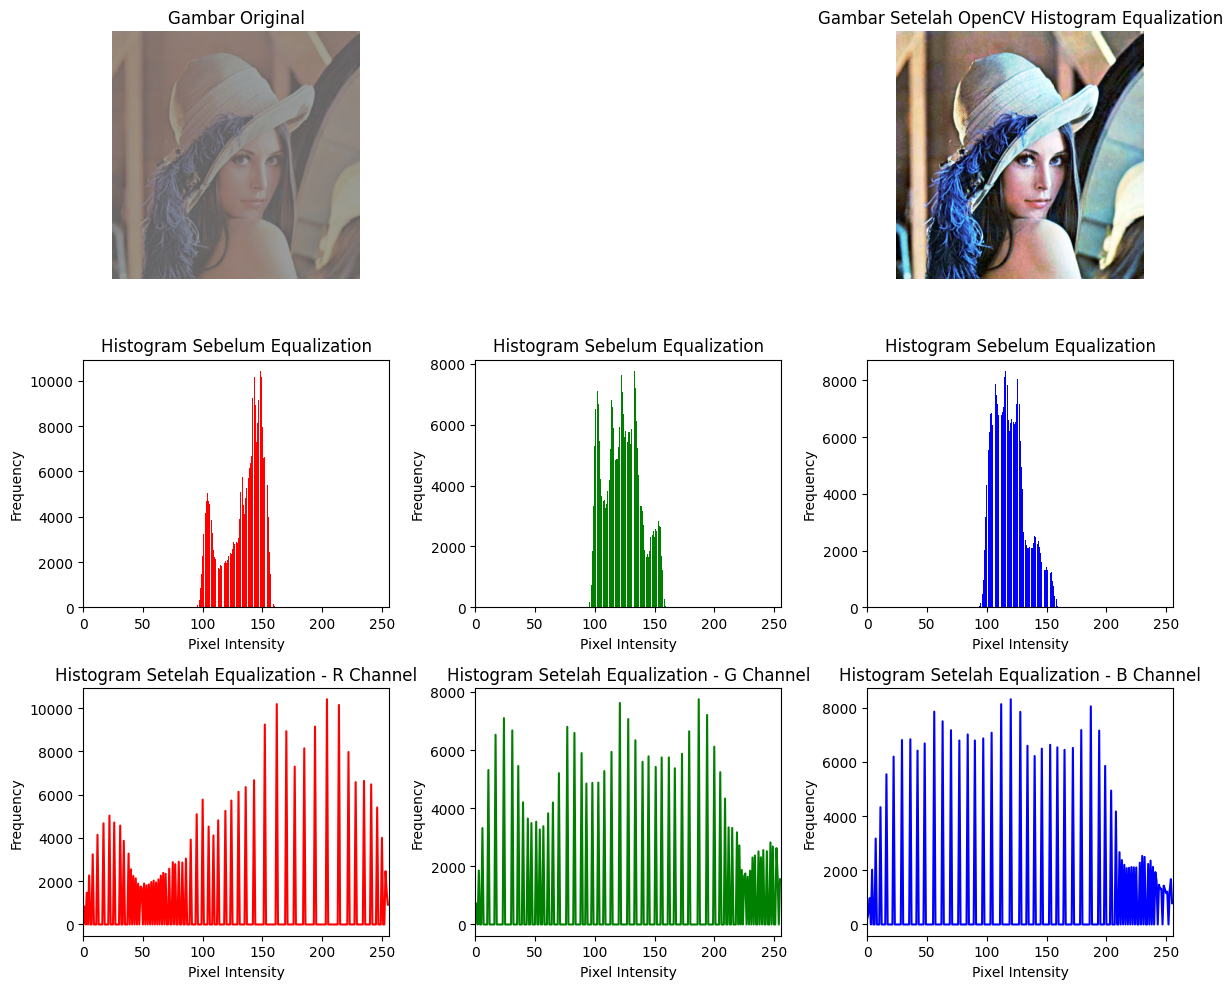

In [6]:
# Step 1: Input image (lena_lc.jpg)
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Step 3: Histogram equalization using cv2.equalizeHist
img_equalized = np.zeros_like(img)
for i in range(3):
    img_equalized[:, :, i] = cv.equalizeHist(img[:, :, i])

# Step 4: Menampilkan gambar asli dan gambar setelah equalization
plt.figure(figsize=(12, 10))

# Original Image
plt.subplot(3, 3, 1)
plt.imshow(img)
plt.title('Gambar Original')
plt.axis('off')

# OpenCV Histogram Equalized Image
plt.subplot(3, 3, 3)
plt.imshow(img_equalized)
plt.title('Gambar Setelah OpenCV Histogram Equalization')
plt.axis('off')

colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    plt.subplot(3, 3, 3 + i + 1)
    hist = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.bar(range(256), hist.flatten(), color=color)
    plt.title('Histogram Sebelum Equalization')
    plt.xlim([0, 256])
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

for i, color in enumerate(colors):
    plt.subplot(3, 3, 6 + i + 1)  # 3 rows, 2 columns
    hist_eq = cv.calcHist([img_equalized], [i], None, [256], [0, 256])
    plt.plot(hist_eq, color=color)
    plt.title(f'Histogram Setelah Equalization - {color.upper()} Channel')
    plt.xlim([0, 256])
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

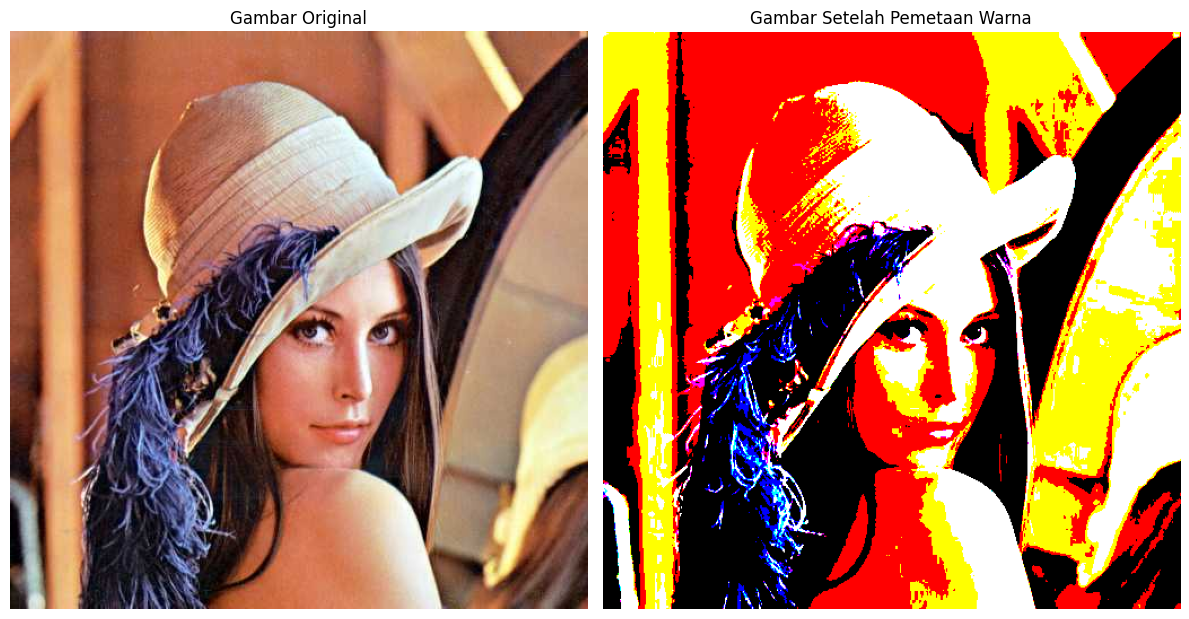

In [7]:
# Fungsi untuk mendeteksi warna terdekat
def get_nearest_color(r, g, b):
    colors = {
        "black": [0, 0, 0],
        "green": [0, 255, 0],
        "yellow": [255, 255, 0],
        "blue": [0, 0, 255],
        "cyan": [0, 255, 255],
        "magenta": [255, 0, 255],
        "red": [255, 0 ,0 ],
        "white": [255, 255, 255]
    }
    # Hitung jarak Euclidean
    distances = {color: np.linalg.norm(np.array([r, g, b]) - np.array(rgb)) for color, rgb in colors.items()}
    nearest_color = min(distances, key=distances.get)
    return colors[nearest_color]

# Memuat gambar
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Mempersiapkan gambar yang dimodifikasi
img_mapped = np.zeros_like(img)

# Melakukan pemetaan warna
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        r, g, b = img[i, j]
        nearest_rgb = get_nearest_color(r, g, b)
        img_mapped[i, j] = nearest_rgb

# Menampilkan hasil
plt.figure(figsize=(12, 8))

# Gambar Original
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Gambar Original')
plt.axis('off')

# Gambar setelah pemetaan warna
plt.subplot(1, 2, 2)
plt.imshow(img_mapped)
plt.title('Gambar Setelah Pemetaan Warna')
plt.axis('off')

plt.tight_layout()
plt.show()

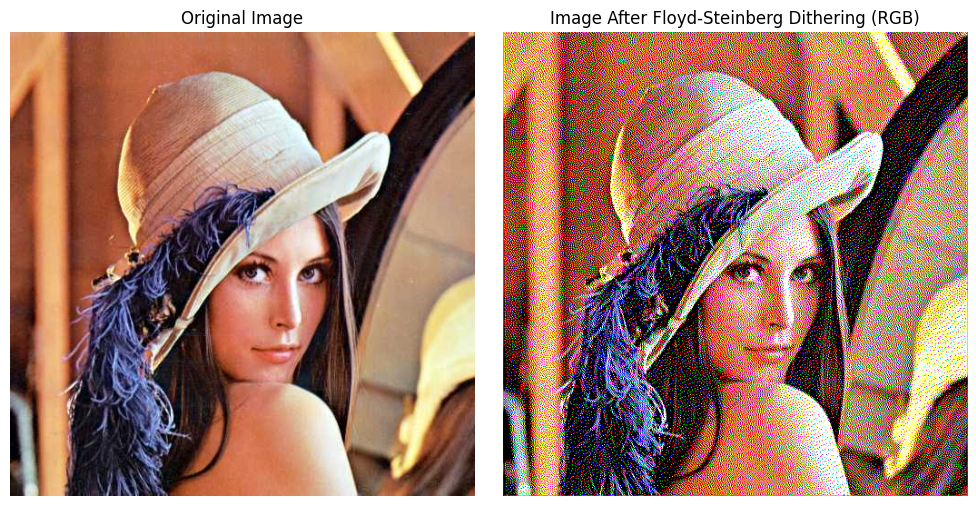

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Floyd-Steinberg dithering matrix
fs_matrix = np.array([[0, 0, 7],
                      [3, 5, 1]]) / 16

# Load the image in RGB format
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Konversi gambar ke RGB

# Normalize the image to have pixel values between 0 and 1
img = img.astype(np.float32) / 255.0

# Get the dimensions of the image
rows, cols, channels = img.shape

# Create a copy of the image to apply the dithering
dithered_img = np.copy(img)

# Apply Floyd-Steinberg dithering on each channel independently
for y in range(rows - 1):
    for x in range(1, cols - 1):
        for c in range(channels):  # Iterasi melalui setiap kanal warna (R, G, B)
            old_pixel = dithered_img[y, x, c]
            new_pixel = np.round(old_pixel)  # Quantize to either 0 or 1
            dithered_img[y, x, c] = new_pixel
            error = old_pixel - new_pixel

            # Distribute the error to neighboring pixels
            dithered_img[y, x+1, c] += error * 7 / 16
            dithered_img[y+1, x-1, c] += error * 3 / 16
            dithered_img[y+1, x, c]   += error * 5 / 16
            dithered_img[y+1, x+1, c] += error * 1 / 16

# Convert dithered image back to 0-255 range for display
dithered_img = (dithered_img * 255).astype(np.uint8)

# Display the original and dithered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dithered_img)
plt.title('Image After Floyd-Steinberg Dithering (RGB)')
plt.axis('off')

plt.tight_layout()
plt.show()

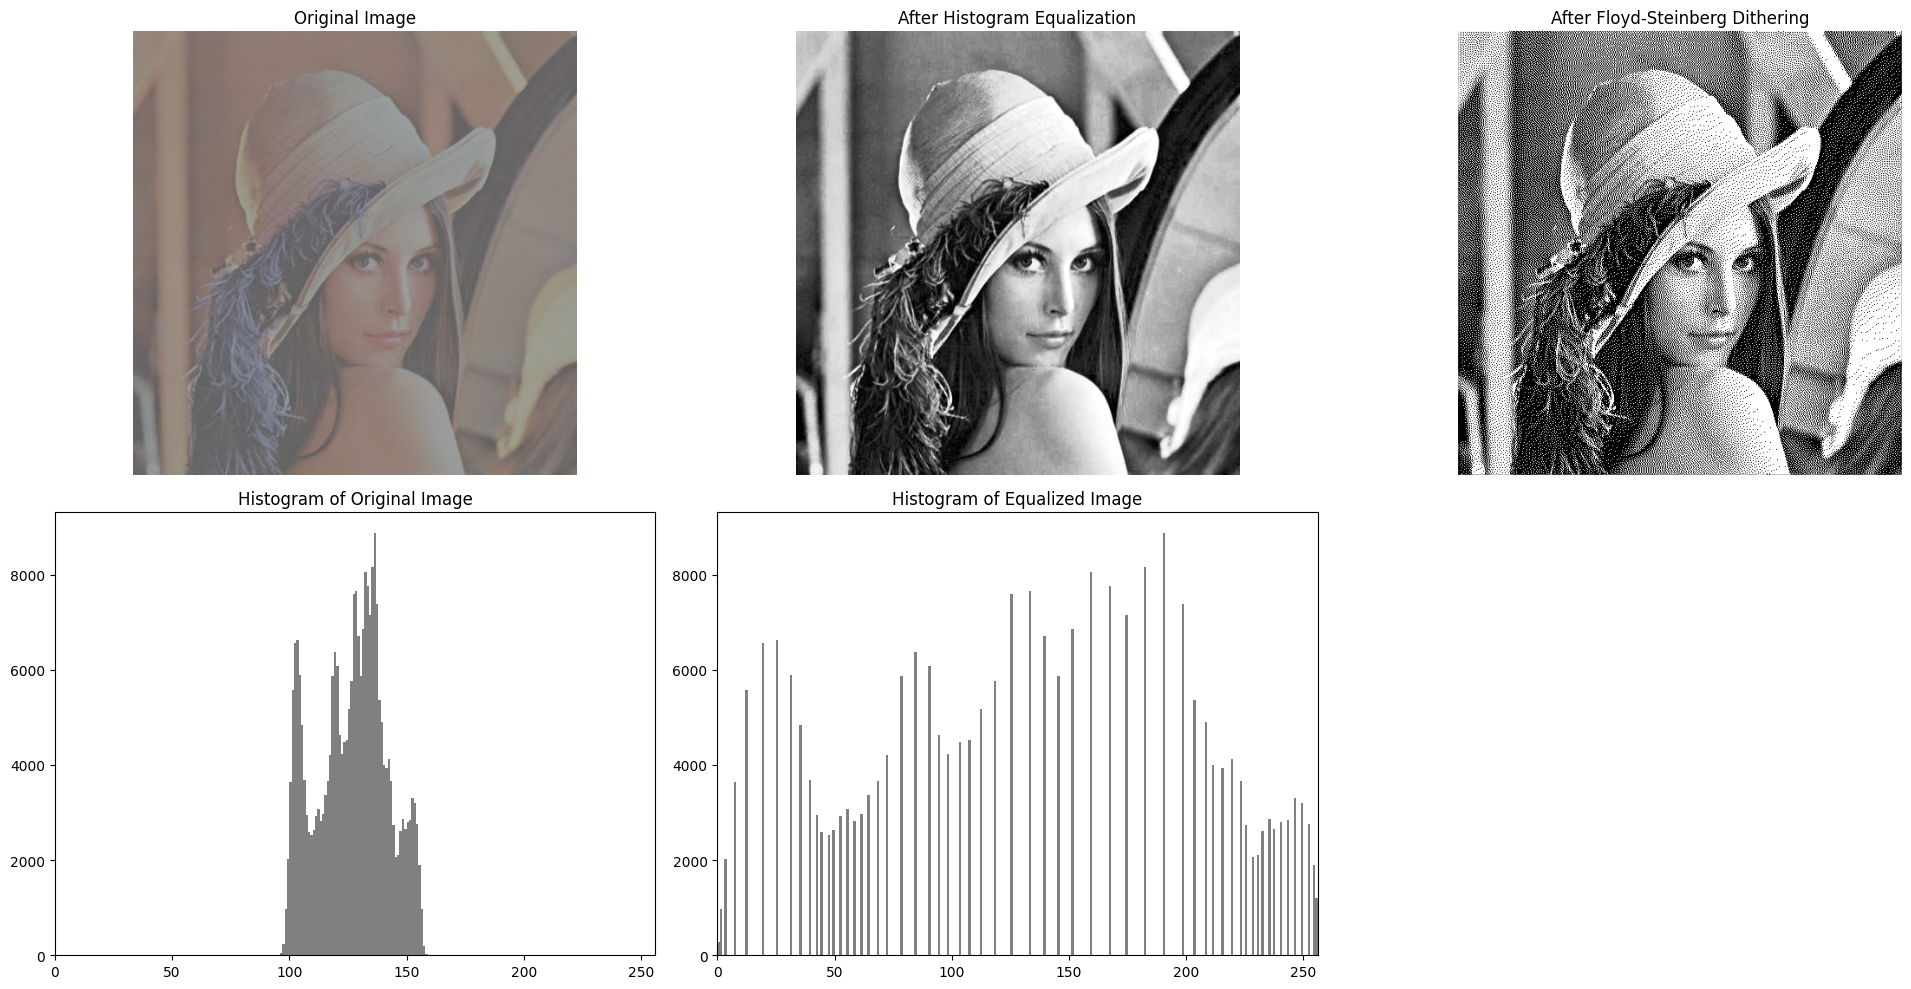

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_path = '/content/drive/MyDrive/PCVK/Images/lena_lc.jpg'  # Sesuaikan dengan path file
img = cv.imread(img_path)
img_ori = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Convert the image to grayscale
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply histogram equalization
equalized_img = cv.equalizeHist(gray_img)

# Floyd-Steinberg dithering matrix
fs_matrix = np.array([[0, 0, 7],
                      [3, 5, 1]]) / 16

# Normalize the equalized image to have pixel values between 0 and 1
img_normalized = equalized_img.astype(np.float32) / 255.0

# Get the dimensions of the image
rows, cols = img_normalized.shape

# Create a copy of the image to apply the dithering
dithered_img = np.copy(img_normalized)

# Apply Floyd-Steinberg dithering
for y in range(rows - 1):
    for x in range(1, cols - 1):
        old_pixel = dithered_img[y, x]
        new_pixel = np.round(old_pixel)  # Quantize to either 0 or 1
        dithered_img[y, x] = new_pixel
        error = old_pixel - new_pixel

        # Distribute the error to neighboring pixels
        dithered_img[y, x + 1] += error * 7 / 16
        dithered_img[y + 1, x - 1] += error * 3 / 16
        dithered_img[y + 1, x] += error * 5 / 16
        dithered_img[y + 1, x + 1] += error * 1 / 16

# Convert dithered image back to 0-255 range for display
dithered_img = (dithered_img * 255).astype(np.uint8)

# Plot original, equalized, dithered images and their histograms
plt.figure(figsize=(20, 10))

# Original Image and Histogram
plt.subplot(2, 3, 1)
plt.imshow(img_ori)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.hist(gray_img.ravel(), bins=256, range=[0, 256], color='gray')
plt.title('Histogram of Original Image')
plt.xlim([0, 256])

# Equalized Image and Histogram
plt.subplot(2, 3, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('After Histogram Equalization')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.hist(equalized_img.ravel(), bins=256, range=[0, 256], color='gray')
plt.title('Histogram of Equalized Image')
plt.xlim([0, 256])

# Dithered Image and Histogram
plt.subplot(2, 3, 3)
plt.imshow(dithered_img, cmap='gray')
plt.title('After Floyd-Steinberg Dithering')
plt.axis('off')

plt.tight_layout()
plt.show()